# TURO Investment Tool

The aim of this project is to bild a model for predicting potential earnings from car sharing. In this project I used a dataset scraped from TURO website, a biggest car sharing platform in the USA. The data can be accessed here
https://www.dropbox.com/s/soayjkg6t8h6a02/Turo%20cars%20March%201%202018.xlsx?dl=0

In [1]:
#Import required libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.cluster import KMeans


/Users/administrator/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
df = pd.read_csv('Turo cars March 1 2018.csv')

# 1. Basic data exploration

At this stage we will do EDA - check the sanity of the data, make observations on the data type, missing values, outliers, shape of the data.

## 1.1. Let's take a look at the raw data

In [3]:
df.describe()

,Car ID,Year,Number of seats,Number of doors,GPS,Convertible,Booking Instantly,Latitude,Longitude,Owner ID,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
count,168109.000000,168109.000000,69655.000000,70911.000000,61296.0,10764.0,168109.000000,168109.000000,168109.000000,1.681090e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,189894.174530,2011.355906,4.946364,3.683434,1.0,1.0,0.050771,36.141199,-98.184779,1.580317e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,113228.021695,5.005899,1.077719,0.807993,0.0,0.0,0.219530,6.754231,24.782085,1.453268e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1923.000000,2.000000,2.000000,1.0,1.0,0.000000,-43.554637,-176.632486,3.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,90826.000000,2009.000000,5.000000,4.000000,1.0,1.0,0.000000,33.375230,-118.332956,3.748740e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,178326.000000,2013.000000,5.000000,4.000000,1.0,1.0,0.000000,35.985748,-96.534165,1.077945e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,291266.000000,2015.000000,5.000000,4.000000,1.0,1.0,0.000000,40.569426,-80.199154,2.449207e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,385423.000000,2019.000000,15.000000,5.000000,1.0,1.0,1.000000,66.895675,174.906819,5.435121e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,Car ID,URL,Make,Model,Trim,Year,Color,Transmission,Fuel Type,Number of seats,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,1,https://turo.com/rentals/cars/nj/montclair/toy...,Toyota,Prius,NaN,2008,NaN,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://turo.com/rentals/cars/ny/franklin-squa...,Toyota,Prius,NaN,2009,NaN,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,https://turo.com/rentals/suvs/ma/cambridge/nis...,Nissan,Murano,NaN,2005,NaN,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,https://turo.com/rentals/cars/ma/cambridge/suz...,Suzuki,Verona,NaN,2005,NaN,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,https://turo.com/rentals/cars/ma/cambridge/hon...,Honda,Accord,NaN,2010,NaN,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168109 entries, 0 to 168108
Data columns (total 100 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Car ID                               168109 non-null  int64  
 1   URL                                  168109 non-null  object 
 2   Make                                 168109 non-null  object 
 3   Model                                168108 non-null  object 
 4   Trim                                 44008 non-null   object 
 5   Year                                 168109 non-null  int64  
 6   Color                                60377 non-null   object 
 7   Transmission                         168109 non-null  object 
 8   Fuel Type                            70907 non-null   object 
 9   Number of seats                      69655 non-null   float64
 10  Number of doors                      70911 non-null   float64
 11  GPS         

In [6]:
# Remove all columns between column index 70 to 99 
df.drop(df.iloc[:, 69:100], inplace = True, axis = 1) 


## 1.2. Separate numerical and non-numerical variables

In [7]:
#Let's split all the variables into 'nimerical' and 'categorical'
non_numeric_columns = df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['URL', 'Make', 'Model', 'Trim', 'Color', 'Transmission', 'Fuel Type',
       'Status', 'City', 'State', 'ZIP Code', 'Country', 'Owner',
       'Custom Delivery fee', 'Airport Delivery fee', 'Registration date',
       'Airport ride needed', 'Vehicle protection',
       'regularAirportDeliveryFee'],
      dtype='object')
The number of non-numerical columns is 19


In [8]:

numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['Car ID', 'Year', 'Number of seats', 'Number of doors', 'GPS',
       'Convertible', 'Booking Instantly ', 'Latitude', 'Longitude',
       'Owner ID', 'Price per day', 'Distance Included/day, Miles, KM',
       'Distance Included/Week, Miles, KM',
       'Distance Included/Monthy, Miles, KM', 'Booking Discount - Weekly',
       'Booking Discount - Monthly', 'Fee for extra mile, $', 'Trip Count',
       'Reviews number', 'Owner rate', 'numberOfFaqs',
       'minimumAgeInYearsToRent', 'numberOfFavorites', 'dateRangeRate',
       'Occupancy Jan', 'Occupancy Feb ', 'Occupancy Mar', 'Occupancy Apr',
       'Occupancy May', 'Occupancy Jun', 'Occupancy Jul', 'Occupancy Aug',
       'Occupancy Sep', 'Occupancy Oct', 'Occupancy Nov', 'Occupancy Dec',
       'Another Occupancy Jan', 'Another Occupancy Feb',
       'Another Occupancy Mar', 'Another Occupancy Apr',
       'Another Occupancy May', 'Another Occupancy Jun',
       'Another Occupancy Jul', 'Another Occupancy Aug',
       'Anoth

## 1.3. MODEL Assumptions


We can assume that the next variables might affects Utilisation Rate:
- Make
- Model
- Year
- Location
- Business Class
- Delivery fees
- Miles included
- Booking discounts
- Owner rate
- Review number
- Number of Faqs
- Minimum age to rent

- We will create additional variable as mean of **Occupancy Rate** and will use it as **target variable**

Our training set will include data about current Earnings for March, February, January 2019.

## 1.4. Creating the Target Variable

In [9]:
df = df[df['Another Occupancy Mar']<31]

In [10]:
df['Ut_Mar'] = (df['Occupancy Mar']+2-df['Another Occupancy Mar'])/(30-df['Another Occupancy Mar'])
df['Ut_Mar'] = np.clip(df['Ut_Mar'], a_max=1, a_min=0)
df['Ut_Feb'] = (df['Occupancy Feb ']+2-df['Another Occupancy Feb'])/(31-df['Another Occupancy Feb'])
df['Ut_Feb'] = np.clip(df['Ut_Feb'], a_max=1, a_min=0)
df['Ut_Jan'] = (df['Occupancy Jan']+2-df['Another Occupancy Jan'])/(31-df['Another Occupancy Jan'])
df['Ut_Jan'] = np.clip(df['Ut_Jan'], a_max=1, a_min=0)

In [11]:
col = df.loc[: , "Ut_Mar":"Ut_Jan"]
df['Ut_R'] = col.mean(axis=1)

In [12]:
df['Ut_R']

22        0.366667
351       0.185185
446       0.368421
1256      0.000000
1375      0.000000
            ...   
168095         NaN
168098    0.000000
168100    0.000000
168104         NaN
168105    0.000000
Name: Ut_R, Length: 20553, dtype: float64

In [13]:
#drop all emply rows since this can be not relevant
df = df.dropna(subset=['Ut_R'])

In [14]:
#this is how our dataframe looking after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19353 entries, 22 to 168105
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Car ID                               19353 non-null  int64  
 1   URL                                  19353 non-null  object 
 2   Make                                 19353 non-null  object 
 3   Model                                19353 non-null  object 
 4   Trim                                 9909 non-null   object 
 5   Year                                 19353 non-null  int64  
 6   Color                                13891 non-null  object 
 7   Transmission                         19353 non-null  object 
 8   Fuel Type                            15694 non-null  object 
 9   Number of seats                      15467 non-null  float64
 10  Number of doors                      15721 non-null  float64
 11  GPS                       

## 2 . Transform some non numerical variables to numerical

### 2.1. Custom Delivery variable

In [15]:
df['Custom Delivery fee'].unique ()

array([nan, 'Free', '60₴', '50₴', '20₴', '10₴', '100₴', '40₴', '90₴',
       '80₴', '120₴', '30₴', '70₴', '$50 ', '$120 ', '$20 ', '$70 ',
       '$30 ', '$60 ', '$80 ', '$100 ', '$40 ', '$10 ', '$90 ', 'CA$30',
       'CA$10', 'CA$20', 'CA$40', 'CA$80', 'CA$50', 'CA$60', 'CA$120',
       'CA$100', 'CA$70', '$110 ', '120 р.', '50 р.', '100 р.', '20 р.',
       '40 р.', '30 р.', '90 р.', '70 р.', '10 р.', '60 р.', '80 р.',
       '£90', '£50', '110 р.', '£40', '£10', 'CA$90', '48.02', '16.02',
       '16.01', '20', '£20', '120', '10', '30', '70'], dtype=object)

In [16]:

import pandas as pd
def remove_whitespace(x):
    try:
        # remove spaces inside and outside of string
        x = "".join(x.split())
    except:
        pass
    return x
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(remove_whitespace)

In [17]:
df['Custom Delivery fee'] = df['Custom Delivery fee'].astype(str)

In [18]:
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('CA', ''))
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('$', ''))
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('£', ''))
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('₴', ''))
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('р.', ''))

In [19]:
df['Custom Delivery fee'].unique ()

array(['nan', 'Free', '60', '50', '20', '10', '100', '40', '90', '80',
       '120', '30', '70', '110', '48.02', '16.02', '16.01'], dtype=object)


Create Categories for the delivery - 
- 1 - don't do delivery
- 2 - Free DELIVERY
- 3 - paid delivery from 1-50
- 4 - paid delivery from 51-120

## 2.2. Distance included

In [20]:
df['Distance Included/day, Miles, KM'].unique

<bound method Series.unique of 22        200.0
351       250.0
446       200.0
1256      200.0
1375      200.0
          ...  
168090    200.0
168092    200.0
168098    100.0
168100    200.0
168105    200.0
Name: Distance Included/day, Miles, KM, Length: 19353, dtype: float64>

In [21]:

df['Distance Included/day, Miles, KM'] = df['Distance Included/day, Miles, KM'].fillna(10000)
df['Distance Included/Week, Miles, KM'] = df['Distance Included/Week, Miles, KM'].fillna(10000)
df['Distance Included/Monthy, Miles, KM'] = df['Distance Included/Monthy, Miles, KM'].fillna(10000)

In [22]:

#Replace nan with 0
df['Custom Delivery fee'] = df['Custom Delivery fee'].fillna(0)
#Replace "Free with 1"
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply( lambda x: x.replace ('Free', '1' ))

In [23]:

#convert variable to numeric
df['Custom Delivery fee'] = df['Custom Delivery fee'].astype(float)

In [24]:
def cat_delivery (del_cost):
    if del_cost == 0:
        return 1
    if del_cost == 1:
        return 2
    if del_cost<50:
        return 3
    else:
        return 4

In [25]:

# we use Pandas' .apply() method by calling the function above.
df['Delivery Group'] = df['Custom Delivery fee'].apply(cat_delivery)

In [26]:
# let's see how many observations we have in each group
print(df.groupby('Delivery Group')["Custom Delivery fee"].count())

Delivery Group
2    2003
3    4183
4    4491
Name: Custom Delivery fee, dtype: int64


### 2.3 Airport Delivery variable

In [27]:
df['regularAirportDeliveryFee'].unique()

array([nan, 'Free', '10₴', '120₴', '20₴', 'Up to $100', 'Up to $80',
       'Up to $120', '40₴', '50₴', '30₴', '100₴', 'Up to $40',
       'Up to $50', 'Up to $70', 'Up to $60', '80₴', 'Up to $90', '70₴',
       'Up to $110', '90₴', '60₴', 'Up to $30', '$120 ', '$20 ', '$30 ',
       '$40 ', '$100 ', '$110 ', '$50 ', '$70 ', '$90 ', '$80 ', '$60 ',
       '$10 ', 'Up to $20', 'CA$30', 'CA$40', 'Up to CA$100', 'CA$50',
       'Up to CA$40', 'CA$80', 'CA$60', 'CA$120', 'Up to CA$70', 'CA$70',
       'Up to CA$80', 'Up to $10', 'Up to CA$90', '20 р.', '40 р.',
       '50 р.', '30 р.', '60 р.', '120 р.', '80 р.', '70 р.', '£30',
       '10 р.', '110 р.', '100 р.', '90 р.', '£60', 'CA$10', 'CA$20',
       'Up to CA$120', 'CA$90', 'Up to CA$60', 'Up to CA$30',
       'Up to CA$50', 'CA$100', 'Up to £60', '20', '120', '30', '90'],
      dtype=object)

In [28]:
import pandas as pd
def remove_whitespace(x):
    try:
        # remove spaces inside and outside of string
        x = "".join(x.split())
    except:
        pass
    return x
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].apply(remove_whitespace)

In [29]:
#clean data
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].astype(str)
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].apply( lambda x: x.replace ('CA', ''))
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].apply( lambda x: x.replace ('€', ''))
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].apply( lambda x: x.replace ('Upto', ''))
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].apply( lambda x: x.replace ('$', ''))
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].apply( lambda x: x.replace ('£', ''))
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].apply( lambda x: x.replace ('₴', ''))
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].apply( lambda x: x.replace ('р.',''))

In [30]:
df['regularAirportDeliveryFee'].unique()

array(['nan', 'Free', '10', '120', '20', '100', '80', '40', '50', '30',
       '70', '60', '90', '110'], dtype=object)

Create Categories for the delivery 
- 1- don't do delivery 
- 2- Free DELIVERY 
- 3- paid delivery from 1-50 
- 4- paid delivery from 51-120

In [31]:
#Replace nan with 0
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].fillna(0)
#Replace "Free with 1"
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].apply( lambda x: x.replace ('Free', '1' ))

In [32]:
#convert variable to numeric
df['regularAirportDeliveryFee'] = df['regularAirportDeliveryFee'].astype(float)
# we use Pandas' .apply() method by calling the function above.
df['Airport Delivery Group'] = df['regularAirportDeliveryFee'].apply(cat_delivery)
# let's see how many observations we have in each group
print(df.groupby('Airport Delivery Group')["regularAirportDeliveryFee"].count())

Airport Delivery Group
2    1791
3    2140
4    4074
Name: regularAirportDeliveryFee, dtype: int64


## 2.4. Year

In [33]:

def cat_year (year_pr):
    if year_pr < 1990:
        return 1
    if year_pr < 2000:
        return 2
    if year_pr<2016:
        return 3
    else:
        return 4

In [34]:
df['YearCar'] = df['Year'].apply(cat_year)

## 2.5. Min Age

In [35]:

##2.4 Minimum age
def age_cat (age):
    if age >= 30:
        return 1
    else:
        return 0


In [36]:
df['MinAge'] = df['minimumAgeInYearsToRent'].apply(age_cat)

## 2.6. City

In [37]:
df.groupby('City').size().sort_values(ascending=False).head(80)

City
Los Angeles         1708
San Francisco        535
Miami                489
Honolulu             481
Denver               478
                    ... 
Mountain View         37
Lewisville            36
Doraville             36
Newark                36
Hallandale Beach      35
Length: 80, dtype: int64

## 3. Check missing data in numerical and replce nan with 0 if relevant

In [38]:

total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head (20)

,Total,Percent
dateRangeRate,19353,1.000000
minimumAgeInYearsToRent,18709,0.966724
Convertible,17633,0.911125
Another Occupancy Jul,15378,0.794605
Another Occupancy Jun,15372,0.794295
Another Occupancy Sep,15322,0.791712
Another Occupancy Aug,15258,0.788405
Another Occupancy May,15119,0.781223
Another Occupancy Oct,15044,0.777347
Another Occupancy Nov,14735,0.761381




#there some variables where missing values mean 0 but some variables empty because owner didn't feel it.
It's better not to us them and drop while replace missing values by 0



After dropping the unsignificant colums we will replace all the missing values with 0 since this is what this is mean

In [39]:
df = df.fillna(0)



##  4. Assign Сategory for every car
Car ID category of the car

In [40]:

#combining make and model into category name
df1 = pd.read_csv ('Category_DB.csv', encoding='ISO-8859–1')
df['for category']= df['Make']+df['Model']
df = pd.merge (df, df1[['Car ID', 'Category']], on  = 'Car ID', how="left")

In [41]:
df.groupby('Category').size().sort_values(ascending=False)

Category
Intermediate    5495
Economy         3854
SUV             2730
Premium SUV     1375
Premium         1292
Convertible     1220
Exotic          1043
Minivan          770
Electric         580
Truck            457
Retro             66
VAN               20
Cargo VAN          7
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19366 entries, 0 to 19365
Data columns (total 79 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Car ID                               19366 non-null  int64  
 1   URL                                  19366 non-null  object 
 2   Make                                 19366 non-null  object 
 3   Model                                19366 non-null  object 
 4   Trim                                 19366 non-null  object 
 5   Year                                 19366 non-null  int64  
 6   Color                                19366 non-null  object 
 7   Transmission                         19366 non-null  object 
 8   Fuel Type                            19366 non-null  object 
 9   Number of seats                      19366 non-null  float64
 10  Number of doors                      19366 non-null  float64
 11  GPS                         

## 5. Check potential Outliers

[Text(0, 0, 'Economy'),
 Text(0, 0, 'Truck'),
 Text(0, 0, 'Intermediate'),
 Text(0, 0, 'SUV'),
 Text(0, 0, 'Premium SUV'),
 Text(0, 0, 'Premium'),
 Text(0, 0, 'VAN'),
 Text(0, 0, 'Electric'),
 Text(0, 0, 'Convertible'),
 Text(0, 0, 'Minivan'),
 Text(0, 0, 'Exotic'),
 Text(0, 0, 'Retro'),
 Text(0, 0, 'Cargo VAN')]

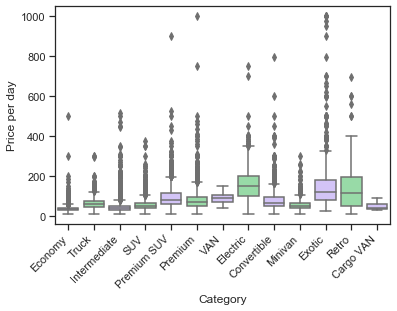

In [43]:
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
chart = sns.boxplot(x="Category", y="Price per day", palette=["m", "g"],
            data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


For the purpose of modelling we would like to keep outliers since it can be really valuable meaning for the cars with low level of utilisation rate

## 6. Utilisation Rate and non numerical variable

(array([10022.,  2549.,  2173.,  1580.,   896.,   741.,   412.,   279.,
          293.,   421.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

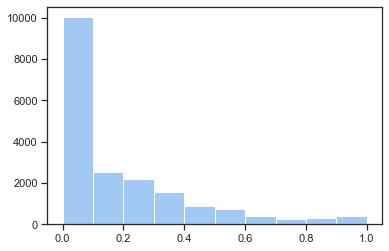

In [44]:
plt.hist(df['Ut_R'])

In [45]:
df['Earning'] = df["Ut_R"]*df['Price per day']

In [46]:
k = df[['Car ID','Category', 'Make', 'Model','City', 'Ut_R', 'Price per day']]
k.head(10)

,Car ID,Category,Make,Model,City,Ut_R,Price per day
0,54,Economy,Toyota,Prius,Oakland,0.366667,50.0
1,558,Economy,Chevrolet,Cavalier,Northfield,0.185185,25.0
2,662,Truck,GMC,Canyon,Virginia Beach,0.368421,42.0
3,2056,Intermediate,Chevrolet,Camaro,Lubbock,0.000000,60.0
4,2324,SUV,Nissan,Rogue,Charlotte,0.000000,57.0
5,2739,NaN,Ford,Fusion,Winnetka,0.269231,59.0
6,2741,Premium SUV,BMW,X4,Jersey City,0.000000,120.0
7,3394,Intermediate,Infiniti,G35,Charlotte,0.140476,67.0
8,3871,Economy,Kia,Rio,austin,0.666667,25.0
9,4410,Premium,Nissan,350Z,Tucson,0.222222,85.0


## 6.1 Check non-numeric variables with the correlation from Target Variable

(array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ]),
 <a list of 9 Text xticklabel objects>)

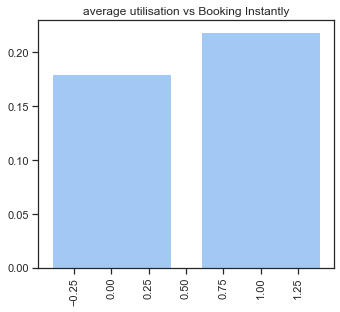

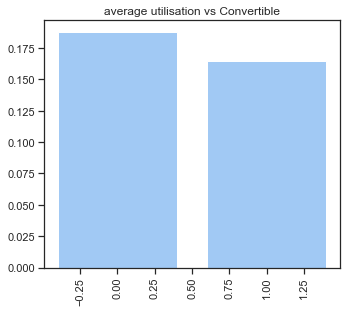

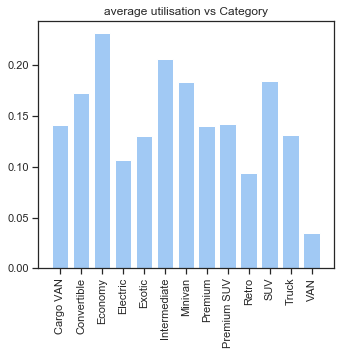

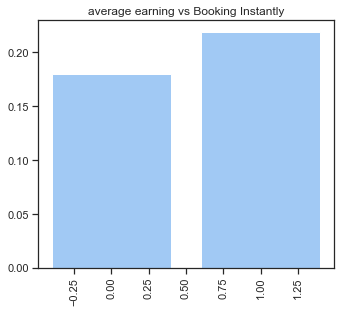

In [47]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.bar(df.groupby("Booking Instantly ")
        ["Ut_R"].mean().index, df.groupby("Booking Instantly ")["Ut_R"].mean())
plt.title("average utilisation vs Booking Instantly")
plt.xticks(rotation="vertical")


plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.bar(df.groupby("Convertible")
        ["Ut_R"].mean().index, df.groupby("Convertible")["Ut_R"].mean())
plt.title("average utilisation vs Convertible")
plt.xticks(rotation="vertical")

plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.bar(df.groupby("Category")
        ["Ut_R"].mean().index, df.groupby("Category")["Ut_R"].mean())
plt.title("average utilisation vs Category")
plt.xticks(rotation="vertical")


plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.bar(df.groupby("Booking Instantly ")
        ["Ut_R"].mean().index, df.groupby("Booking Instantly ")["Ut_R"].mean())
plt.title("average earning vs Booking Instantly")
plt.xticks(rotation="vertical")


## 7. Adding location clasters with Lat Long

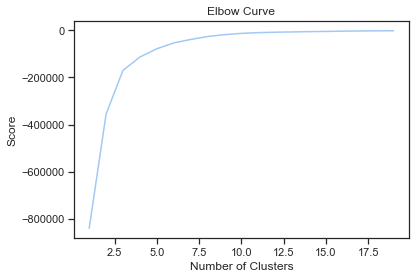

In [48]:

# Variable with the Longitude and Latitude
Z = df[['Car ID','Latitude','Longitude']]
K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(Z[Z.columns[1:3]]) # Compute k-means clustering.
Z['cluster_label'] = kmeans.fit_predict(Z[Z.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Z[Z.columns[1:3]]) # Labels of each point

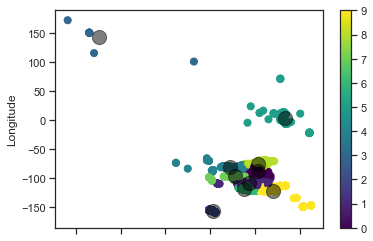

In [50]:
Z.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [51]:
df = df.merge(Z, left_on='Car ID', right_on='Car ID')
df.head(5)

,Car ID,URL,Make,Model,Trim,Year,Color,Transmission,Fuel Type,Number of seats,...,Delivery Group,Airport Delivery Group,YearCar,MinAge,for category,Category,Earning,Latitude_y,Longitude_y,cluster_label
0,54,https://turo.com/rentals/cars/ca/oakland/toyot...,Toyota,Prius,0,2005,BLUE,A,0,0.0,...,4,4,3,0,ToyotaPrius,Economy,18.333333,37.815679,-122.266536,6
1,558,https://turo.com/rentals/cars/il/northfield/ch...,Chevrolet,Cavalier,0,2002,WHITE,A,0,0.0,...,4,4,3,0,ChevroletCavalier,Economy,4.629630,42.094631,-87.763109,0
2,662,https://turo.com/rentals/trucks/va/virginia-be...,GMC,Canyon,0,2006,GRAY,A,Gas,4.0,...,4,4,3,0,GMCCanyon,Truck,15.473684,36.829443,-76.154374,8
3,2056,https://turo.com/rentals/cars/tx/lubbock/chevr...,Chevrolet,Camaro,0,2011,BLACK,A,0,0.0,...,2,4,3,0,ChevroletCamaro,Intermediate,0.000000,33.608731,-101.889552,7
4,2324,https://turo.com/rentals/suvs/nc/charlotte/nis...,Nissan,Rogue,SV,2017,BLACK,A,Gas,5.0,...,4,2,4,0,NissanRogue,SUV,0.000000,35.221075,-80.944374,4


# 8. BUILD THE REGRESSION MODEL

### Transform non-numerica cells into dummies 

In [52]:
df = pd.concat([df,pd.get_dummies(df.Category, prefix="Categ", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.Convertible, prefix="Conv", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df['Airport Delivery Group'], prefix="Deliv", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df['Booking Instantly '], prefix="Book_Inst", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df['City'], prefix="cty", drop_first=True)], axis=1)

In [53]:
dummy_column_names = list(pd.get_dummies(df.Category, prefix="Categ", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df.Convertible, prefix="Conv", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df['Airport Delivery Group'], prefix="Deliv", drop_first=True).columns)
#with city included
dummy_column_names1 = dummy_column_names + list(pd.get_dummies(df['City'], prefix="cty", drop_first=True).columns)

In [54]:
dummy_column_names

['Categ_Convertible',
 'Categ_Economy',
 'Categ_Electric',
 'Categ_Exotic',
 'Categ_Intermediate',
 'Categ_Minivan',
 'Categ_Premium',
 'Categ_Premium SUV',
 'Categ_Retro',
 'Categ_SUV',
 'Categ_Truck',
 'Categ_VAN',
 'Conv_1.0',
 'Deliv_3',
 'Deliv_4']

## 8.2. OLS MODEL

In [74]:
# Y is the target variable
Y = df['Ut_R']
# X is the feature set which includes
X = df[['Reviews number', 'Owner rate', 'Trip Count', 'GPS', 
         'Distance Included/day, Miles, KM', 'Distance Included/Monthy, Miles, KM','Distance Included/Week, Miles, KM',
        'Booking Discount - Weekly', 'Booking Discount - Monthly', 'Fee for extra mile, $', 'numberOfFavorites', 
        'minimumAgeInYearsToRent', 'Price per day', 'Year', 'cluster_label'
        ]+dummy_column_names]

import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ut_R   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     236.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:50:11   Log-Likelihood:                 3579.1
No. Observations:               19392   AIC:                            -7096.
Df Residuals:                   19361   BIC:                            -6852.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.5012      0.857      5.250      0.000       2.821       6.182
Reviews number                          0.0012      0.000      3.582      0.000       0.001       0.002
Owner rate                              0.0178      0.001     22.521      0.000       0.016       0.019
Trip Count                              0.0020      0.000      8.059      0.000       0.002       0.002
GPS                                    -0.0121      0.003     -3.533      0.000      -0.019      -0.005
Distance Included/day, Miles, KM     2.521e-06   1.75e-06      1.437      0.151   -9.17e-07    5.96e-06
Distance Included/Monthy, Miles, KM  4.787e-06   1.32e-06      3.637      0.000    2.21e-06    7.37e-06
Distance Included/Week, Miles, KM   -3.322e-06   2.26e-06     -1.472      0.141   -7.75e-06     1.1e-06
Booking Discount - Weekly              -0.0004      0.000     -0.759      0.448      -0.001       0.001
Booking Discount - Monthly             -0.0017      0.000     -6.006      0.000      -0.002      -0.001
Fee for extra mile, $                   0.0067      0.004      1.620      0.105      -0.001       0.015
numberOfFavorites                       0.0001   2.89e-05      4.181      0.000    6.42e-05       0.000
minimumAgeInYearsToRent                 0.0006      0.000      1.682      0.093   -9.38e-05       0.001
Price per day                          -0.0004   3.28e-05    -11.213      0.000      -0.000      -0.000
Year                                   -0.0022      0.000     -5.052      0.000      -0.003      -0.001
cluster_label                          -0.0061      0.001    -10.721      0.000      -0.007      -0.005
Categ_Convertible                      -0.0024      0.014     -0.169      0.866      -0.031       0.026
Categ_Economy                           0.0251      0.010      2.514      0.012       0.006       0.045
Categ_Electric                         -0.0391      0.013     -2.926      0.003      -0.065      -0.013
Categ_Exotic                           -0.0292      0.012     -2.450      0.014      -0.053      -0.006
Categ_Intermediate                      0.0184      0.010      1.882      0.060      -0.001       0.038
Categ_Minivan                          -0.0192      0.012     -1.612      0.107      -0.043       0.004
Categ_Premium                          -0.0171      0.011     -1.556      0.120      -0.039       0.004
Categ_Premium SUV                      -0.0147      0.011     -1.345      0.179      -0.036       0.007
Categ_Retro                            -0.0803      0.030     -2.644      0.008      -0.140      -0.021
Categ_SUV                              -0.0026      0.010     -0.253      0.801      -0.022       0.017
Categ_Truck                            -0.0459      0.013     -3.44

The results need to be improve. Let's add another variable "City"

In [82]:
# Let's add city as an extra variable
# Y is the target variable
Y = df['Ut_R']
# X is the feature set which includes
X = df[['Reviews number', 'Owner rate', 'Trip Count', 'GPS', 
         'Distance Included/day, Miles, KM', 'Distance Included/Monthy, Miles, KM','Distance Included/Week, Miles, KM',
        'Booking Discount - Weekly', 'Booking Discount - Monthly', 'Fee for extra mile, $', 'numberOfFavorites', 
        'minimumAgeInYearsToRent', 'Price per day', 'Year', 'cluster_label'
        ]+dummy_column_names1]
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ut_R   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     5.441
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:56:58   Log-Likelihood:                 5054.8
No. Observations:               19392   AIC:                            -6310.
Df Residuals:                   17492   BIC:                             8648.
Df Model:                        1899                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   5.3687      0.937      5.728      0.000       3.532       7.206
Reviews number                          0.0012      0.000      3.598      0.000       0.001       0.002
Owner rate                              0.0170      0.001     20.192      0.000       0.015       0.019
Trip Count                              0.0022      0.000      8.646      0.000       0.002       0.003
GPS                                    -0.0085      0.004     -2.399      0.016      -0.016      -0.002
Distance Included/day, Miles, KM     7.787e-07   1.78e-06      0.437      0.662   -2.72e-06    4.27e-06
Distance Included/Monthy, Miles, KM   5.05e-06    1.4e-06      3.618      0.000    2.31e-06    7.79e-06
Distance Included/Week, Miles, KM   -4.027e-06   2.32e-06     -1.739      0.082   -8.57e-06    5.11e-07
Booking Discount - Weekly               0.0006      0.001      1.083      0.279      -0.000       0.002
Booking Discount - Monthly             -0.0015      0.000     -4.917      0.000      -0.002      -0.001
Fee for extra mile, $                   0.0061      0.004      1.356      0.175      -0.003       0.015
numberOfFavorites                    4.295e-05   3.05e-05      1.411      0.158   -1.67e-05       0.000
minimumAgeInYearsToRent                 0.0004      0.000      1.046      0.295      -0.000       0.001
Price per day                          -0.0003   3.48e-05     -9.129      0.000      -0.000      -0.000
Year                                   -0.0029      0.000     -6.307      0.000      -0.004      -0.002
cluster_label                          -0.0025      0.003     -0.806      0.420      -0.008       0.004
Categ_Convertible                      -0.0107      0.015     -0.727      0.467      -0.039       0.018
Categ_Economy                           0.0213      0.010      2.066      0.039       0.001       0.042
Categ_Electric                         -0.0372      0.014     -2.683      0.007      -0.064      -0.010
Categ_Exotic                           -0.0390      0.012     -3.181      0.001      -0.063      -0.015
Categ_Intermediate                      0.0118      0.010      1.163      0.245      -0.008       0.032
Categ_Minivan                          -0.0261      0.012     -2.128      0.033      -0.050      -0.002
Categ_Premium                          -0.0287      0.011     -2.528      0.011      -0.051      -0.006
Categ_Premium SUV                      -0.0161      0.011     -1.426      0.154      -0.038       0.006
Categ_Retro                            -0.1350      0.032     -4.252      0.000      -0.197      -0.073
Categ_SUV                              -0.0041      0.011     -0.389      0.697      -0.025       0.017
Categ_Truck                            -0.0594      0.014     -4.25

This result is much better, however it is far from being relevant. Also, seeing this much difference between R and R sq saying that the results are very overfitted. We will continue to use the original model with location clasters. Let's clean the variables based on p-value (less than 0.1)

In [95]:
# Y is the target variable
Y = df['Ut_R']
# X is the feature set which includes
X1 = df[['Reviews number', 'Owner rate', 'Trip Count', 'GPS', 'Distance Included/Monthy, Miles, KM','Distance Included/Week, Miles, KM', 'Booking Discount - Monthly', 'Fee for extra mile, $', 'numberOfFavorites', 
        'minimumAgeInYearsToRent', 'Price per day', 'Year', 
        'Categ_Electric', 'Categ_Intermediate', 'Categ_Economy', 'Categ_Retro', 'Categ_Truck','Categ_VAN',
        'Conv_1.0', 'Deliv_4'
        ]+dummy_column_names]

import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ut_R   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:59:20   Log-Likelihood:                 3519.5
No. Observations:               19392   AIC:                            -6983.
Df Residuals:                   19364   BIC:                            -6763.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.8850      0.858      5.691      0.000       3.202       6.568
Reviews number                          0.0013      0.000      3.769      0.000       0.001       0.002
Owner rate                              0.0182      0.001     22.900      0.000       0.017       0.020
Trip Count                              0.0019      0.000      7.799      0.000       0.001       0.002
GPS                                    -0.0134      0.003     -3.921      0.000      -0.020      -0.007
Distance Included/Monthy, Miles, KM  4.028e-06   1.32e-06      3.060      0.002    1.45e-06    6.61e-06
Distance Included/Week, Miles, KM    9.975e-08   1.37e-06      0.073      0.942   -2.58e-06    2.78e-06
Booking Discount - Monthly             -0.0019      0.000    -13.978      0.000      -0.002      -0.002
Fee for extra mile, $                   0.0076      0.004      1.838      0.066      -0.001       0.016
numberOfFavorites                       0.0001    2.9e-05      3.752      0.000    5.19e-05       0.000
minimumAgeInYearsToRent                 0.0005      0.000      1.359      0.174      -0.000       0.001
Price per day                          -0.0004   3.28e-05    -10.957      0.000      -0.000      -0.000
Year                                   -0.0024      0.000     -5.528      0.000      -0.003      -0.002
Categ_Electric                         -0.0197      0.007     -2.938      0.003      -0.033      -0.007
Categ_Intermediate                      0.0090      0.005      1.837      0.066      -0.001       0.019
Categ_Economy                           0.0123      0.005      2.448      0.014       0.002       0.022
Categ_Retro                            -0.0429      0.015     -2.815      0.005      -0.073      -0.013
Categ_Truck                            -0.0210      0.007     -3.145      0.002      -0.034      -0.008
Categ_VAN                              -0.0424      0.023     -1.835      0.067      -0.088       0.003
Conv_1.0                               -0.0215      0.005     -4.268      0.000      -0.031      -0.012
Deliv_4                                -0.0141      0.003     -5.466      0.000      -0.019      -0.009
Categ_Convertible                      -0.0019      0.014     -0.130      0.896      -0.030       0.026
Categ_Economy                           0.0123      0.005      2.448      0.014       0.002       0.022
Categ_Electric                         -0.0197      0.007     -2.938      0.003      -0.033      -0.007
Categ_Exotic                           -0.0294      0.012     -2.461      0.014      -0.053      -0.006
Categ_Intermediate                      0.0090      0.005      1.837      0.066      -0.001       0.019
Categ_Minivan                          -0.0162      0.012     -1.36

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


The number of observations in training set is 15513
The number of observations in test set is 3879


In [97]:
X_train = sm.add_constant(X_train)

In [98]:
#We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ut_R   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:59:23   Log-Likelihood:                 2857.6
No. Observations:               15513   AIC:                            -5659.
Df Residuals:                   15485   BIC:                            -5445.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.8349      0.960      5.038      0.000       2.954       6.716
Reviews number                          0.0014      0.000      3.683      0.000       0.001       0.002
Owner rate                              0.0179      0.001     20.201      0.000       0.016       0.020
Trip Count                              0.0019      0.000      6.640      0.000       0.001       0.002
GPS                                    -0.0113      0.004     -2.946      0.003      -0.019      -0.004
Distance Included/Monthy, Miles, KM    2.9e-06   1.47e-06      1.971      0.049    1.67e-08    5.78e-06
Distance Included/Week, Miles, KM    1.061e-06   1.53e-06      0.693      0.488   -1.94e-06    4.06e-06
Booking Discount - Monthly             -0.0019      0.000    -12.693      0.000      -0.002      -0.002
Fee for extra mile, $                   0.0073      0.005      1.594      0.111      -0.002       0.016
numberOfFavorites                    8.521e-05    3.2e-05      2.662      0.008    2.25e-05       0.000
minimumAgeInYearsToRent                 0.0005      0.000      1.260      0.208      -0.000       0.001
Price per day                          -0.0004   3.67e-05     -9.699      0.000      -0.000      -0.000
Year                                   -0.0023      0.000     -4.892      0.000      -0.003      -0.001
Categ_Electric                         -0.0191      0.007     -2.564      0.010      -0.034      -0.005
Categ_Intermediate                      0.0081      0.005      1.492      0.136      -0.003       0.019
Categ_Economy                           0.0119      0.006      2.145      0.032       0.001       0.023
Categ_Retro                            -0.0471      0.018     -2.679      0.007      -0.082      -0.013
Categ_Truck                            -0.0249      0.007     -3.358      0.001      -0.039      -0.010
Categ_VAN                              -0.0419      0.027     -1.579      0.114      -0.094       0.010
Conv_1.0                               -0.0222      0.006     -3.963      0.000      -0.033      -0.011
Deliv_4                                -0.0135      0.003     -4.647      0.000      -0.019      -0.008
Categ_Convertible                      -0.0051      0.016     -0.321      0.748      -0.036       0.026
Categ_Economy                           0.0119      0.006      2.145      0.032       0.001       0.023
Categ_Electric                         -0.0191      0.007     -2.564      0.010      -0.034      -0.005
Categ_Exotic                           -0.0276      0.013     -2.077      0.038      -0.054      -0.002
Categ_Intermediate                      0.0081      0.005      1.492      0.136      -0.003       0.019
Categ_Minivan                          -0.0151      0.013     -1.14

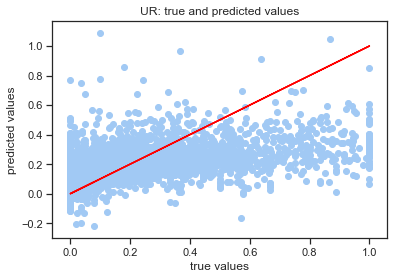

R-squared of the model in the training set is: 0.2660126367172627
-----Test set statistics-----
R-squared of the model in the test set is: 0.25274123760410083
Mean absolute error of the prediction is: 0.1460840525809766
Mean squared error of the prediction is: 0.04165601773167146
Root mean squared error of the prediction is: 0.20409805910804607
Mean absolute percentage error of the prediction is: inf


In [99]:
X_test = sm.add_constant(X_test)

# We are making predictions
y_preds = results.predict(X_test)

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("UR: true and predicted values")
plt.show()

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The model isn't overfitted so let's cofirm it with other regressions

## 8.3. Ridge/Lasso/Elastic Net Regressions

In [103]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -3.1992511548617486e-05
Mean absolute error of the prediction is: 0.1838987176006744
Mean squared error of the prediction is: 0.05574688783673308
Root mean squared error of the prediction is: 0.23610778859820164
Mean absolute percentage error of the prediction is: inf


In [104]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -3.1992511548617486e-05
Mean absolute error of the prediction is: 0.1838987176006744
Mean squared error of the prediction is: 0.05574688783673308
Root mean squared error of the prediction is: 0.23610778859820164
Mean absolute percentage error of the prediction is: inf


In [105]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -3.1992511548617486e-05
Mean absolute error of the prediction is: 0.1838987176006744
Mean squared error of the prediction is: 0.05574688783673308
Root mean squared error of the prediction is: 0.23610778859820164
Mean absolute percentage error of the prediction is: inf


## Conclusions: the OLS that we got model that is explain our data on 30%. We need to look after another factors or try another models to improve the results

# For other models let's standartize our data

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

X1_s = scaler.fit_transform(X1)


## 8.4. Random Forest

We can say for that we can use Random Forest for defining will be car rented next month or now And use Random Forest Classifier. We can develop this idea later. 

## 8.5. Support Vector Machine

In [132]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X1_s,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [138]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X1, Y, cv=10)

array([ 0.06638601,  0.175696  ,  0.05533059,  0.09878378, -0.00990057,
       -0.13776398, -0.11210158, -0.07738693, -0.19226154, -1.76651911])

the score is vey low and different so we won't relay on this model

## 8.6. KNN

In [142]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
#finding the best number
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [146]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

In [173]:
predictions = knn.predict(x_test_scaled)

In [174]:
# Get the actual values for the test set.
actual = y_test
# Compute the mean squared error of our predictions.
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
print("Mean absolute error of the prediction is: {}".format(mse))

Mean absolute error of the prediction is: 0.04212473351761975


## Conclusions: The area of car sharing is growing and defining the most important factors for increasing the utility rate is very important car owners.We define KNN the best model to use due to the low value of error 0.04 as other models gave bigger value. However, other factors still need to be considered for adjusting the model and improving the predictions value and also important for business owners point of view.